In [1]:
# import scanpy as sc
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import warnings
# from numba.core.errors import NumbaDeprecationWarning

# warnings.filterwarnings(action="ignore", category=NumbaDeprecationWarning)
# warnings.filterwarnings(
#     action="ignore", module="scanpy", message="No data for colormapping"
# )
%matplotlib inline

In [2]:
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

/tmp/ipykernel_111641/2174054843.py:8: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [3]:
%%R
# library(tidyverse)
library(dyno)

Loading required package: dynfeature
Loading required package: dynguidelines
Loading required package: dynmethods
Loading required package: dynplot
Loading required package: dynwrap
In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


In [4]:
%%R
data <- readRDS("mesoderm-development_loh (1).rds")
# str(data)

In [5]:
%%R
counts <- data$counts
expression <- data$expression

In [6]:
%%R
dataset <- wrap_expression(
  expression = expression,
  counts = counts
)

In [7]:
%%R --o grouping
print(data$prior_information$start_id)
print(data$prior_information$start_milestones)
grouping <- data$grouping
# grouping <- ifelse(grouping == "H7hESC", "H7hESC", "temp")
# grouping <- ifelse(names(grouping) == "SRR3952356", "start", "temp")
# str(grouping)

[1] "SRR3952356"
[1] "H7hESC"


In [8]:
%%R
dataset <- add_prior_information(
    dataset,
    start_id = data$prior_information$start_id
)
dataset <- add_grouping(
    dataset,
    data$grouping
)

In [9]:
!docker --version


Docker version 27.5.1, build 9f9e405


In [10]:
%%R
paga_model <- infer_trajectory(dataset, ti_paga(), give_priors = c("start_id"))

Coloring by grouping


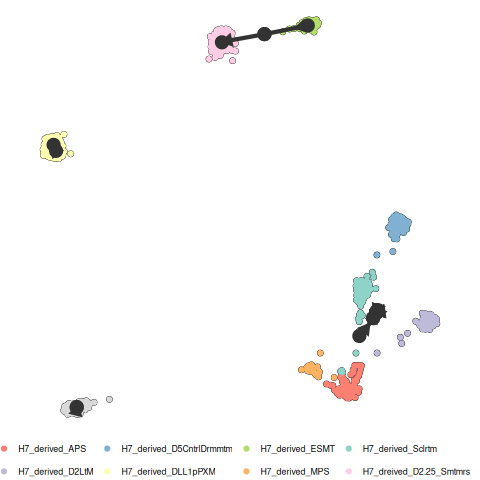

In [15]:
%%R
plot_dimred(paga_model, grouping=grouping)

In [13]:
%%R
scorpius_model <- infer_trajectory(dataset, ti_scorpius(), give_priors = c("start_id"))

Following packages have to be installed: SCORPIUS
Do you want to install these packages? 
1: Yes [default]
2: No
Skipping install of 'SCORPIUS' from a github remote, the SHA1 (a0a97907) has not changed since last install.
  Use `force = TRUE` to force installation


Coloring by grouping


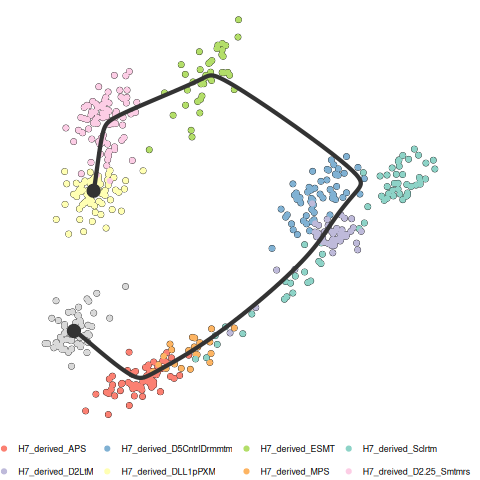

In [14]:
%%R
plot_dimred(scorpius_model, grouping=grouping)